# Training a neural network on Cat Dog Wolf with Keras

By Richard Yue


In [1]:
%load_ext tensorboard

In [2]:
!export CUDA_VISIBLE_DEVICES=0

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import datetime

2025-02-04 22:56:32.161520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738727792.182331 1696899 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738727792.188773 1696899 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 22:56:32.209541: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
!rm -rf ./logs/

In [6]:
IMG_SIZE = (224, 224)
TRAIN_BATCH_SIZE = 32
VAL_BATCH_SIZE = 32
NUM_CLASSES = 3
EPOCHS = 325

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

!find . -name '.DS_Store' -type f -delete

train_path = 'cats-dogs-wolves-/datasets'
test_path = 'cats-dogs-wolves-/testData'
print("Paths Loaded.")

image_size = (224, 224)
classes = ['cats', 'dogs', 'wolves']

train_datagen = ImageDataGenerator(validation_split=0.25, horizontal_flip=True) # set validation split

train_dataset = train_datagen.flow_from_directory(train_path, image_size, batch_size=TRAIN_BATCH_SIZE, classes=classes, subset='training')
val_dataset = train_datagen.flow_from_directory(train_path, image_size, batch_size=VAL_BATCH_SIZE, classes=classes, subset='validation')
test_dataset = ImageDataGenerator().flow_from_directory(test_path, image_size, classes=classes, batch_size=128)

Paths Loaded.
Found 272 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


In [42]:
import random
import tensorflow as tf
import numpy as np
seed = 926
print(f"seed: {seed}")
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
tf.config.experimental.enable_op_determinism() 
tf.config.experimental.set_synchronous_execution(True)
tf.random.set_global_generator(tf.random.Generator.from_seed(seed))
tf.random.get_global_generator().reset_from_seed(seed)
model = VGG16(weights='imagenet', include_top=False, input_shape= IMG_SIZE + (3,))
model.summary()

seed: 926


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [44]:
import keras
import tensorflow as tf

tf.keras.regularizers.L2(
    l2=0.4
)
x = keras.layers.GlobalAveragePooling2D()(model.output)
x = keras.layers.LayerNormalization()(x)
x = keras.layers.Dense(2048, activation='relu', kernel_regularizer='l2')(x)
x = keras.layers.LayerNormalization()(x)
x = keras.layers.Dense(1024, activation='relu', kernel_regularizer='l2')(x)
x = keras.layers.LayerNormalization()(x)
x = keras.layers.Dense(512, activation='relu', kernel_regularizer='l2')(x)
x = keras.layers.LayerNormalization()(x)
x = keras.layers.Dense(256, activation='relu', kernel_regularizer='l2')(x)
x = keras.layers.LayerNormalization()(x)
x = keras.layers.Dense(128, activation='relu', kernel_regularizer='l2')(x)
x = keras.layers.LayerNormalization()(x)
x = keras.layers.Dense(64, activation='relu', kernel_regularizer='l2')(x)
x = keras.layers.LayerNormalization()(x)
x = keras.layers.Dense(32, activation='relu', kernel_regularizer='l2')(x)
x = keras.layers.LayerNormalization()(x)
x = keras.layers.Dense(16, activation='relu', kernel_regularizer='l2')(x)
x = keras.layers.LayerNormalization()(x)
x = keras.layers.Dense(8, activation='relu', kernel_regularizer='l2')(x)
x = keras.layers.LayerNormalization()(x)
output = keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)

In [45]:
model = keras.models.Model(inputs=model.input, outputs=output)

In [46]:
import numpy as np
import random
log_dir = './'
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [47]:
%%time
#model training

class TargetValAccCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold, threshold_2):
        super(TargetValAccCallback, self).__init__()
        self.threshold = threshold
        self.threshold_2 = threshold_2

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs["val_categorical_accuracy"]
        train_acc = logs["categorical_accuracy"]
        if val_acc >= self.threshold and train_acc >= self.threshold_2:
            self.model.stop_training = True

early_stopping_callback = TargetValAccCallback(threshold=0.98, threshold_2=0)

history = model.fit(
    train_dataset,
    epochs=325,
    validation_data=val_dataset,
    callbacks=[tensorboard_callback, early_stopping_callback]
  )

Epoch 1/325
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 696ms/step - categorical_accuracy: 0.4342 - loss: 36.7335 - val_categorical_accuracy: 0.7000 - val_loss: 35.9472
Epoch 2/325
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 486ms/step - categorical_accuracy: 0.6959 - loss: 36.0486 - val_categorical_accuracy: 0.8444 - val_loss: 35.7641
Epoch 3/325
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 512ms/step - categorical_accuracy: 0.8920 - loss: 35.6241 - val_categorical_accuracy: 0.7556 - val_loss: 35.9096
Epoch 4/325
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 514ms/step - categorical_accuracy: 0.8180 - loss: 35.7029 - val_categorical_accuracy: 0.8111 - val_loss: 35.6350
Epoch 5/325
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 491ms/step - categorical_accuracy: 0.9034 - loss: 35.4816 - val_categorical_accuracy: 0.9222 - val_loss: 35.3327
Epoch 6/325
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 491ms/step - categorical_accuracy: 0.9674 - loss: 35.2376 - val_categorical_accuracy: 0.9333 - val_loss: 35.2323
Epoch 7/325
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 500ms/step - categorical_accuracy: 0.9852

In [48]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 40])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

def plot_acc(history):
  plt.plot(history.history['categorical_accuracy'], label='accuracy')
  plt.plot(history.history['val_categorical_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

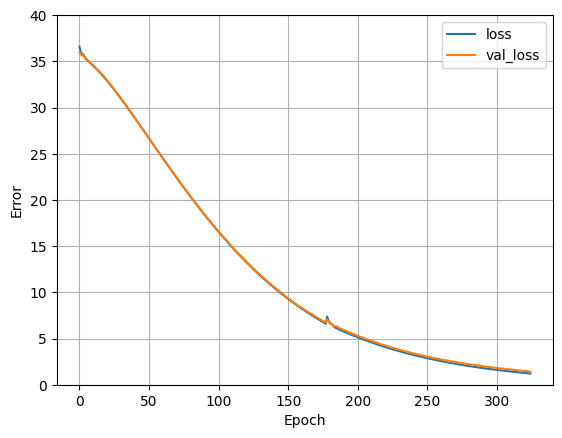

In [49]:
plot_loss(history)

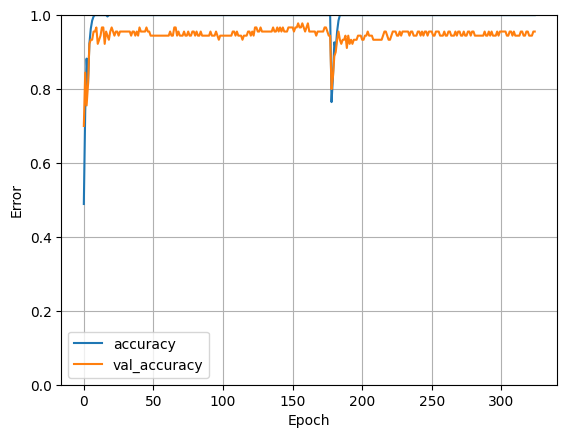

In [50]:
plot_acc(history)

In [51]:
print("Evaluation on test data:")
results = model.evaluate(test_dataset)

Evaluation on test data:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - categorical_accuracy: 0.9619 - loss: 1.3773 


Found 272 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
[2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1]
133
2/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step 

2025-02-05 00:42:10.180874: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


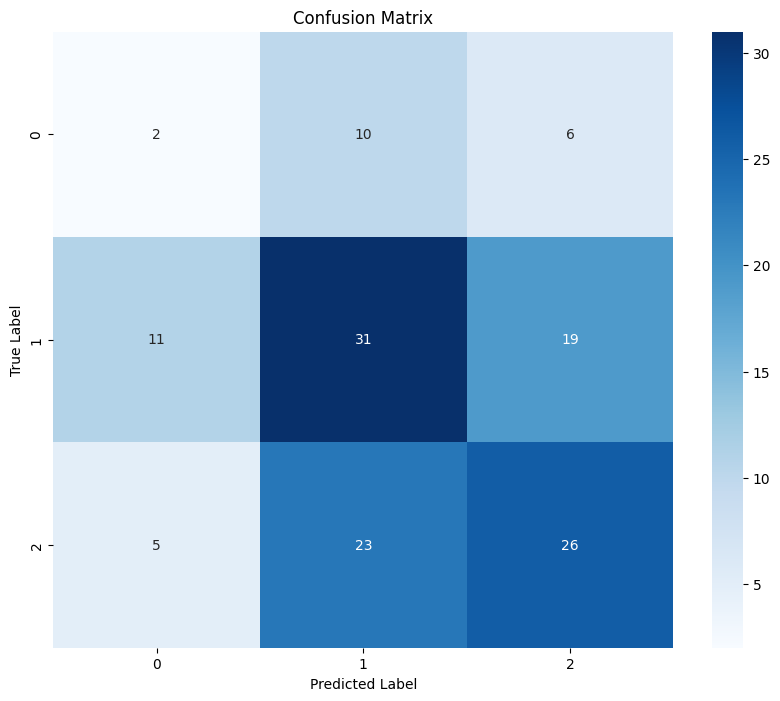

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

train_batches = train_datagen.flow_from_directory(train_path, image_size, classes=classes, batch_size=15, subset='training')
valid_batches = train_datagen.flow_from_directory(train_path, image_size, classes=classes, batch_size=8, subset='validation')
test_batches = ImageDataGenerator().flow_from_directory(test_path, image_size, classes=classes, batch_size=133)
test_images, test_labels = next(iter(test_batches))
y_test =np.argmax(next(test_batches)[1], axis=1).tolist()
print(y_test)
print(len(y_test))

predicted_probabilities = model.predict(test_images)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("Values given are macro")
print("****")
print(f"Precision: {precision_score(y_test, predicted_labels, average='macro')}")
print(f"Recall: {recall_score(y_test, predicted_labels, average='macro')}")
print(f"Macro F1: {f1_score(y_test, predicted_labels, average='macro')}")

Values given are macro
****
Precision: 0.3684300108932462
Recall: 0.36692977130135596
Macro F1: 0.36744973544973547
